# 產生各種波形，並視覺化

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pywt

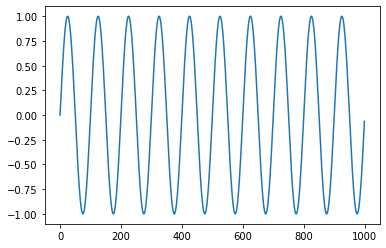

In [2]:
#產生10Hz的訊號
num_samples = 100
time = np.linspace(0,1,1000, endpoint=False)
#time = np.arange(num_samples)
frequency = 10
sinwave = np.sin(2 * np.pi * frequency * time)
plt.plot(sinwave)
plt.show()

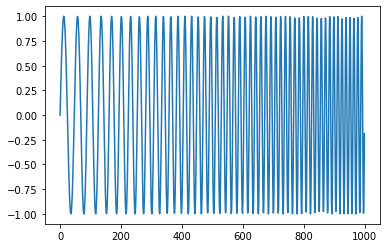

In [3]:
#產生20Hz -100Hz的Chirp訊號

num_samples = 1000
time = np.linspace(0, 1, num_samples, endpoint=True)
#time = np.arange(num_samples)
fmin = 20
fmax = 50
#frequency = np.linspace(0, num_samples, num_samples ,endpoint=True) * ((fmax - fmin)/ num_samples ) + fmin
frequency = np.arange(num_samples) *  ((fmax - fmin)/ num_samples) + fmin
sinwave = np.sin(2 * np.pi * frequency * time)
plt.plot( sinwave)
plt.show()

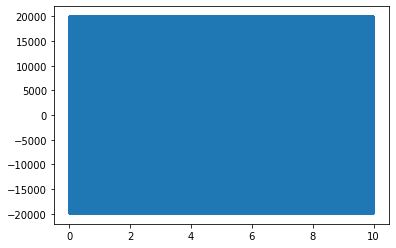

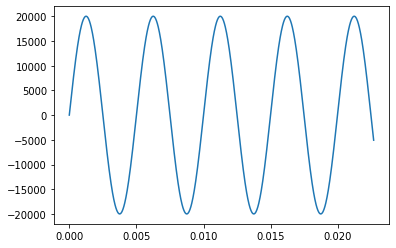

In [4]:
import wave
import struct

amplitude = 20000            #振幅
duration  = 10                #時間長度(秒)
fs = 44100                   #取樣頻率 
num_samples = duration * fs  #樣本數
num_channels = 1             #通道
sample_width = 2             #樣本寬度
num_frames = num_samples     #音框數 = 樣本數
comptype = 'NONE'            #壓縮型態
compname = 'not compressed'

time = np.linspace(0, duration ,num_samples, endpoint=True)

#====產生chirp訊號=====
fmin = 200
fmax = 400
frequency = np.linspace(0, num_samples, num_samples ,endpoint=True) * ((fmax - fmin)/num_samples) + fmin
x = amplitude * np.sin(2 * np.pi * frequency * time)

plt.plot(time, x)
plt.show()

plt.plot(time[:1000], x[:1000])
plt.show()

filename = 'chirp.wav'       #指定檔案名稱
wavefile =  wave.open(filename,'w')
wavefile.setparams((num_channels, sample_width, fs, num_frames ,comptype,compname))

#寫入wave檔須將每個樣本(或音框)的浮點數轉為整數，再使用struct的pack轉換成2個位元組(byte)或16位元(bits)的整數儲存(即'h'的格式定義)
for s in x:
    wavefile.writeframes( struct.pack('h',int(s)))

wavefile.close()

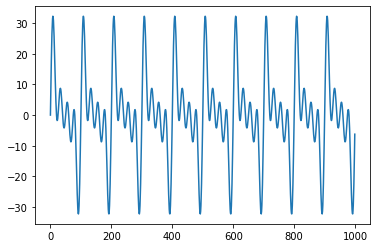

In [5]:
#產生10Hz 20Hz 30Hz 40Hz的混合訊號

num_samples = 1000
amplitude = 10
time = np.linspace(0,1,num_samples, endpoint=False)
#time = np.arange(num_samples)
newwave = np.zeros(num_samples)
freq_list = [10,20,30,40]
for freq in freq_list:
    wave_part = amplitude * np.sin(2 * np.pi * freq * time)
    newwave += wave_part
plt.plot( newwave)
plt.show()

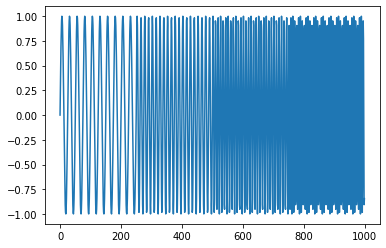

In [6]:
#產生10Hz 20Hz 30Hz 40Hz的分段訊號
num_samples = 1000

#time = np.arange(num_samples)
#time_part = np.arange(num_samples/4)

time = np.linspace(0, 1, num_samples, endpoint=False)
time_part = np.linspace(0, 1, int(num_samples/4) , endpoint=False)

newwave = []
newwave = np.array(newwave)

freq_list = [10,20,30,40]
for freq in freq_list:
    newwave_part = np.sin(2 * np.pi * freq * time_part)
    newwave = np.append(newwave, newwave_part)
plt.plot( newwave)
plt.show()

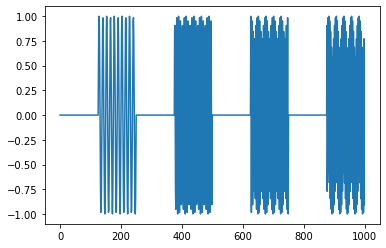

In [7]:
#在分段訊號之中加pause

freq_list = [10,20,30,40]

num_samples = 1000

#每個頻率波段之前加一段pause，因此共有8段part
part_length = int( num_samples/(2*len(freq_list)) )

time = np.linspace(0, 1, num_samples, endpoint=False)
time_part = np.linspace(0, 1, int(num_samples/(2*len(freq_list))) , endpoint=False)


newwave = []
newwave = np.array(newwave)

for freq in freq_list:
    pause_part = np.zeros( part_length )
    wave_part = np.sin(2 * np.pi * freq * time_part)
    newwave = np.append(newwave , pause_part)
    newwave = np.append(newwave , wave_part)
plt.plot(newwave)
plt.show()

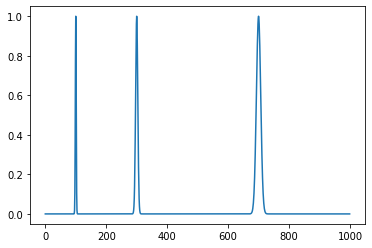

In [8]:
# 製作 gaussian bumps
"""
用不同的sigma製作gaussian峰
2∗σ1=2 
2∗σ2=10 
2∗σ3=20 
"""
num_samples = 1000
time = np.arange(num_samples)

s1 = 2
s2 = 5
s3 = 10

events_time = num_samples * np.array([0.1, 0.3, 0.7])

bumps = np.exp(-( (time-events_time[0]) / s1 )**2 ) + \
        np.exp(-( (time-events_time[1]) / s2 )**2 ) + \
        np.exp(-( (time-events_time[2]) / s3 )**2 ) 

plt.plot(bumps)
plt.show()

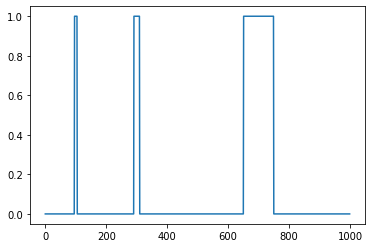

In [9]:
#繪製step

num_samples = 1000
time = np.arange(num_samples)

w1 = 5
w2 = 10
w3 = 50

events_time = num_samples * np.array([0.1, 0.3, 0.7])

steps = ((time > events_time[0]-w1) & (time < events_time[0]+w1)) + \
        ((time > events_time[1]-w2) & (time < events_time[1]+w2)) + \
        ((time > events_time[2]-w3) & (time < events_time[2]+w3))

plt.plot(steps)
plt.show()

SNR: 100.0
SNR in db: 20.0


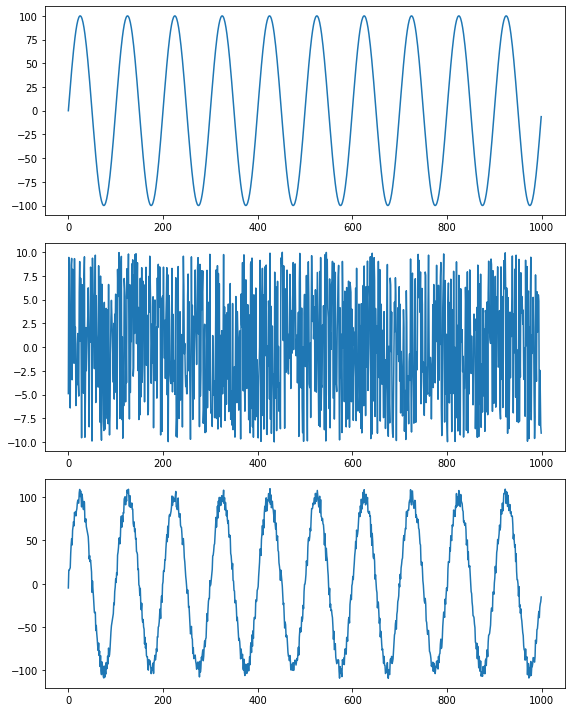

In [61]:
#在sin波加一些雜訊

#產生訊號
num_samples = 1000
#time = np.arange(num_samples)
time = np.linspace(0, 1, num_samples, endpoint=False)

amplitude = 100
frequency = 10
sinwave = amplitude * np.sin(2 * np.pi * frequency * time)

noise_amplitude = 10
noise = np.random.uniform(-noise_amplitude, noise_amplitude, num_samples)
newwave = sinwave + noise

snr = (amplitude /noise_amplitude)**2
snr_db = 10 * np.log10(snr)
print('SNR:',snr)
print('SNR in db:', snr_db)

fig, axes = plt.subplots(3, 1, figsize=(8,10))
axes[0].plot(sinwave)
axes[1].plot(noise)
axes[2].plot(newwave)

fig.tight_layout()
plt.show()

# 進行頻譜分析和小波分析

In [17]:
from scipy.fftpack import fft,fftfreq,fftshift

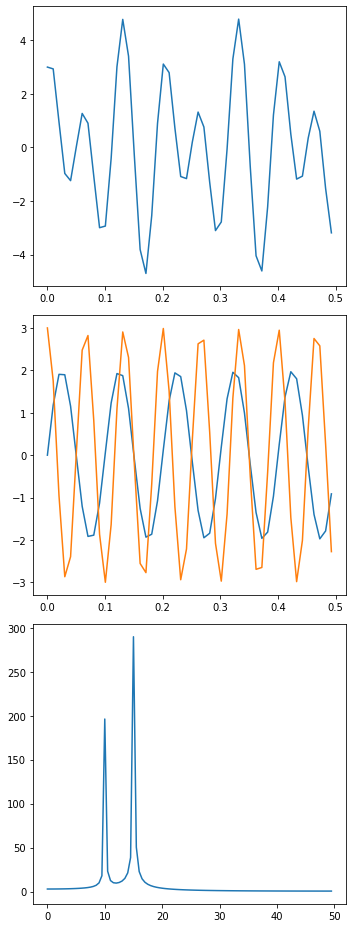

In [63]:

duration  = 2                #時間長度(秒)
fs = 100                     #取樣頻率 
num_samples = duration * fs  #樣本數
frequency = 10               #產生10Hz的訊號

time = np.linspace(0, duration ,num_samples, endpoint=True)
sig1 = 2 * np.sin(2 * np.pi * frequency * time) 
sig2 = 3 * np.cos(2 * np.pi * 15 * time)  
sig = sig1 + sig2


#進行頻譜分析
#fftfreq 第一個引數n是FFT的點數，一般取FFT之後的資料的長度（size）
#        第二個引數d是取樣週期，其倒數就是取樣頻率fs，即d=1/fs

#fftshift用來調整順序，讓資料平移以原點為中心
f_values = fftshift(fftfreq( num_samples, 1/fs))
x = fftshift( fft(sig) )
fft_values = abs(x)
#因計算出來的是對稱的，故只取一半顯示
f_values = f_values[ int(num_samples/2) :]
fft_values = fft_values[ int(num_samples/2) :]

fig, axes = plt.subplots(3, 1, figsize=(5,13))
axes[0].plot(time[:50] , sig[:50])
axes[1].plot(time[:50] , sig1[:50],time[:50] , sig2[:50])
axes[2].plot(f_values , fft_values)

fig.tight_layout()

plt.show()


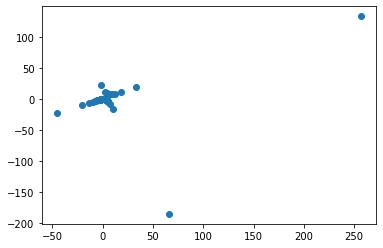

In [51]:
f_values = fftshift(fftfreq( num_samples, 1/fs))
x = fftshift( fft(sig) )
fft_values = abs(x)

#x.real, x.imag
#plt.scatter(np.arange(int(num_samples/2)), x.real[int(num_samples/2) :])
#plt.scatter(np.arange(int(num_samples/2)), x.imag[int(num_samples/2) :])
#plt.plot(x.real[int(num_samples/2) :])
#plt.plot(x.imag[int(num_samples/2) :])
plt.scatter(x.real[int(num_samples/2) :] , x.imag[int(num_samples/2) :])
plt.show()

In [37]:
#平移頻率

duration  = 2                #時間長度(秒)
fs = 100                     #取樣頻率 
num_samples = duration * fs  #樣本數
frequency = 10               #產生10Hz的訊號

time = np.linspace(0, duration ,num_samples, endpoint=True)
sig1 = np.sin(2 * np.pi * frequency * time) 
sig = sig1 * np.exp(20*time)

50
50


In [18]:
#繪製小波分析圖
import pywt

def plot_wavelet(ax, time, signal, scales, waveletname = 'cmor1.5-1.0', 
                 cmap = plt.cm.seismic, title = '', ylabel = '', xlabel = ''):
    
    dt = time[1] - time[0]
    [coefficients, frequencies] = pywt.cwt(signal, scales, waveletname, dt)
    power = (abs(coefficients)) ** 2
    period = 1. / frequencies
    levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8]
    contourlevels = np.log2(levels)
    
    im = ax.contourf(time, np.log2(period), np.log2(power), contourlevels, extend='both',cmap=cmap)
    
    ax.set_title(title, fontsize=20)
    ax.set_ylabel(ylabel, fontsize=18)
    ax.set_xlabel(xlabel, fontsize=18)
    
    yticks = 2**np.arange(np.ceil(np.log2(period.min())), np.ceil(np.log2(period.max())))
    ax.set_yticks(np.log2(yticks))
    ax.set_yticklabels(yticks)
    ax.invert_yaxis()
    ylim = ax.get_ylim()
    ax.set_ylim(ylim[0], -1)
    return yticks, ylim

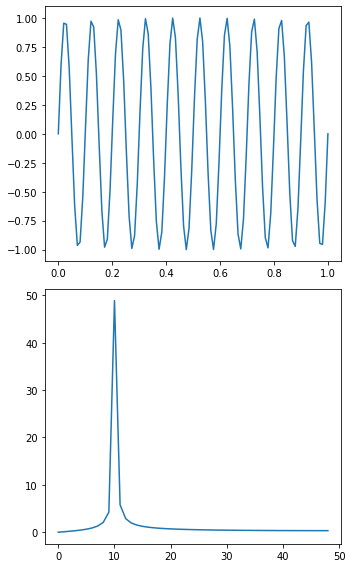

[100.          50.          33.33333333  25.          20.
  16.66666667  14.28571429  12.5         11.11111111  10.
   9.09090909   8.33333333   7.69230769   7.14285714   6.66666667
   6.25         5.88235294   5.55555556   5.26315789   5.
   4.76190476   4.54545455   4.34782609   4.16666667   4.
   3.84615385   3.7037037    3.57142857   3.44827586   3.33333333
   3.22580645   3.125        3.03030303   2.94117647   2.85714286
   2.77777778   2.7027027    2.63157895   2.56410256   2.5
   2.43902439   2.38095238   2.3255814    2.27272727   2.22222222
   2.17391304   2.12765957   2.08333333   2.04081633   2.
   1.96078431   1.92307692   1.88679245   1.85185185   1.81818182
   1.78571429   1.75438596   1.72413793   1.69491525   1.66666667
   1.63934426   1.61290323   1.58730159]


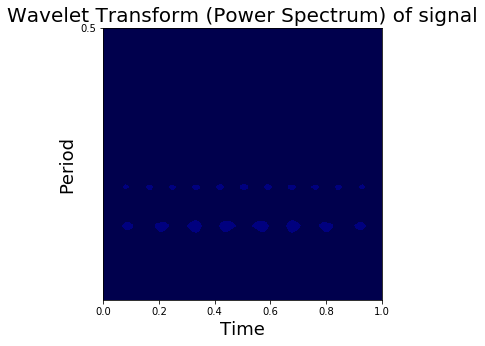

In [28]:
#繪製小波分析圖

duration  = 1                #時間長度(秒)
fs = 100                     #取樣頻率 
num_samples = duration * fs  #樣本數
frequency = 10               #產生10Hz的訊號

time = np.linspace(0, duration ,num_samples, endpoint=True)
sig = np.sin(2 * np.pi * frequency * time)


#進行頻譜分析
f_values = fftshift(fftfreq( num_samples, 1/fs))
x = fftshift( fft(sig) )
fft_values = abs(x)
f_values = f_values[ int(num_samples/2) :-1]
fft_values = fft_values[ int(num_samples/2) :-1]

#繪圖
fig, axes = plt.subplots(2, 1, figsize=(5,8))
axes[0].plot(time , sig)
axes[1].plot(f_values , fft_values)
fig.tight_layout()

plt.show()


title = 'Wavelet Transform (Power Spectrum) of signal'
ylabel = 'Period'
xlabel = 'Time'

#採樣頻率 100Hz
dt = 1/fs
scales = np.arange(1, 64)
frequencies = pywt.scale2frequency('cmor1.5-1.0', scales ) /dt
print(frequencies)

fig, ax = plt.subplots(figsize=(5, 5))
plot_wavelet(ax, time, sig, scales, xlabel=xlabel, ylabel=ylabel, title=title)
plt.show()

In [241]:
import scaleogram as scg 
scg.set_default_wavelet('cmor1-1.5')

# Try these ones to see various compromises between scales and time resolution 
#scg.set_default_wavelet('cgau5')
#scg.set_default_wavelet('cgau1')
#scg.set_default_wavelet('shan0.5-2')
#scg.set_default_wavelet('mexh')

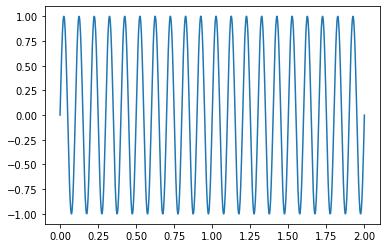

wavelet : cmor1-1.5 ( Complex Morlet wavelets )


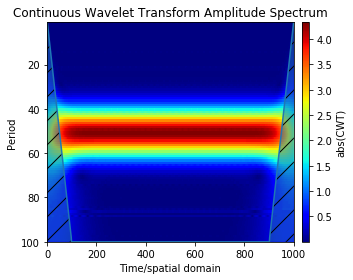

In [274]:

duration  = 2                #時間長度(秒)

fs = 500                     #取樣頻率  (每秒採樣多少點)
num_samples = duration * fs  #樣本數
frequency = 10               #產生10Hz的訊號

time = np.linspace(0, duration ,num_samples, endpoint=True)
signal = np.sin(2 * np.pi * frequency * time)


scales = scg.periods2scales( np.arange(1, 100) )

#繪圖
plt.plot(time , signal)
plt.show()

# Scaleogram
ax2 = scg.cws(signal, scales=scales,  figsize=(5,4)) 
#txt = ax2.annotate("p1=10s", xy=(100, 10), bbox=dict(boxstyle="round4", fc="w"))
plt.tight_layout()

print("wavelet :", scg.get_default_wavelet(), "(",
      pywt.ContinuousWavelet(scg.get_default_wavelet()).family_name, ")")

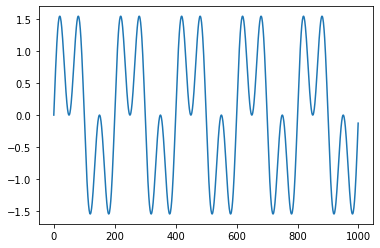

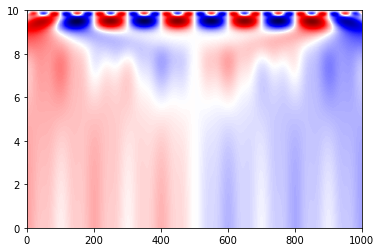

(1024, 1000)


In [101]:
from scipy import signal
import matplotlib.pyplot as plt


time = np.linspace(0,1,1000, endpoint=False)
sig  = np.sin(2 * np.pi * 5 * time)   +   np.sin(2 * np.pi * 15 * time)
#繪圖 
plt.plot(sig)
plt.show()

widths = np.arange(2**-20,2**10)

cwtmatr = signal.cwt(sig, signal.ricker, widths)
plt.imshow(cwtmatr, extent=[0, len(time),0 , 10] ,
           cmap = plt.cm.seismic , 
           aspect ='auto',
           vmax = abs(cwtmatr).max() , 
           vmin = -abs(cwtmatr).max()
          )
plt.show()
print(cwtmatr.shape)


(30, 1000)

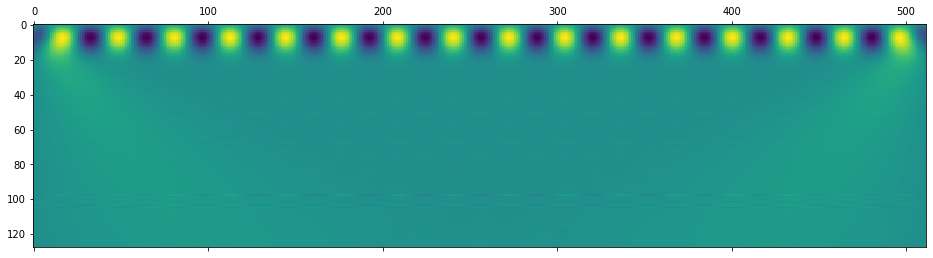

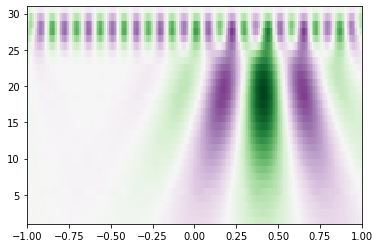

In [301]:
# https://pywavelets.readthedocs.io/en/latest/ref/cwt.html
import pywt
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(512)
y = np.sin(2*np.pi*x/32)
coef, freqs=pywt.cwt(y,np.arange(1,129),'gaus1')
plt.matshow(coef)                  # doctest: +SKIP
plt.show()                         # doctest: +SKIP

import pywt
import numpy as np
import matplotlib.pyplot as plt
t = np.linspace(-1, 1, 200, endpoint=False)
sig  = np.cos(2 * np.pi * 7 * t) + np.real(np.exp(-7*(t-0.4)**2)*np.exp(1j*2*np.pi*2*(t-0.4)))
widths = np.arange(1, 31)
cwtmatr, freqs = pywt.cwt(sig, widths, 'mexh')
plt.imshow(cwtmatr, extent=[-1, 1, 1, 31], cmap='PRGn', aspect='auto',
            vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())  # doctest: +SKIP
plt.show()                            # doctest: +SKIP

In [15]:
#採樣頻率 100Hz
dt = .01
frequencies = pywt.scale2frequency('cmor1.5-1.0', [1, 2, 3, 4]) /dt
frequencies

array([100.        ,  50.        ,  33.33333333,  25.        ])

Continuous wavelet will be evaluated over the range [-8.0, 8.0]


Text(0.5, 1.0, '|FFT(filter)|$^2$')

findfont: Font family ['STIXGeneral'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXGeneral'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXGeneral'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXNonUnicode'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXNonUnicode'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXNonUnicode'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeOneSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeTwoSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeThreeSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeFourSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeFiveSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmsy10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmr10'] not found

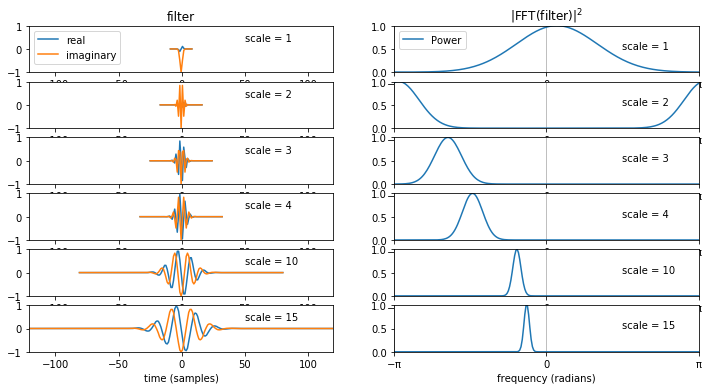

In [29]:
import numpy as np
import pywt
import matplotlib.pyplot as plt

wav = pywt.ContinuousWavelet('cmor1.5-1.0')

# print the range over which the wavelet will be evaluated
print("Continuous wavelet will be evaluated over the range [{}, {}]".format(
    wav.lower_bound, wav.upper_bound))

width = wav.upper_bound - wav.lower_bound

scales = [1, 2, 3, 4, 10, 15]

max_len = int(np.max(scales)*width + 1)
t = np.arange(max_len)
fig, axes = plt.subplots(len(scales), 2, figsize=(12, 6))
for n, scale in enumerate(scales):

    # The following code is adapted from the internals of cwt
    int_psi, x = pywt.integrate_wavelet(wav, precision=10)
    step = x[1] - x[0]
    j = np.floor(
        np.arange(scale * width + 1) / (scale * step))
    if np.max(j) >= np.size(int_psi):
        j = np.delete(j, np.where((j >= np.size(int_psi)))[0])
    j = j.astype(np.int)

    # normalize int_psi for easier plotting
    int_psi /= np.abs(int_psi).max()

    # discrete samples of the integrated wavelet
    filt = int_psi[j][::-1]

    # The CWT consists of convolution of filt with the signal at this scale
    # Here we plot this discrete convolution kernel at each scale.

    nt = len(filt)
    t = np.linspace(-nt//2, nt//2, nt)
    axes[n, 0].plot(t, filt.real, t, filt.imag)
    axes[n, 0].set_xlim([-max_len//2, max_len//2])
    axes[n, 0].set_ylim([-1, 1])
    axes[n, 0].text(50, 0.35, 'scale = {}'.format(scale))

    f = np.linspace(-np.pi, np.pi, max_len)
    filt_fft = np.fft.fftshift(np.fft.fft(filt, n=max_len))
    filt_fft /= np.abs(filt_fft).max()
    axes[n, 1].plot(f, np.abs(filt_fft)**2)
    axes[n, 1].set_xlim([-np.pi, np.pi])
    axes[n, 1].set_ylim([0, 1])
    axes[n, 1].set_xticks([-np.pi, 0, np.pi])
    axes[n, 1].set_xticklabels([r'$-\pi$', '0', r'$\pi$'])
    axes[n, 1].grid(True, axis='x')
    axes[n, 1].text(np.pi/2, 0.5, 'scale = {}'.format(scale))

axes[n, 0].set_xlabel('time (samples)')
axes[n, 1].set_xlabel('frequency (radians)')
axes[0, 0].legend(['real', 'imaginary'], loc='upper left')
axes[0, 1].legend(['Power'], loc='upper left')
axes[0, 0].set_title('filter')
axes[0, 1].set_title(r'|FFT(filter)|$^2$')

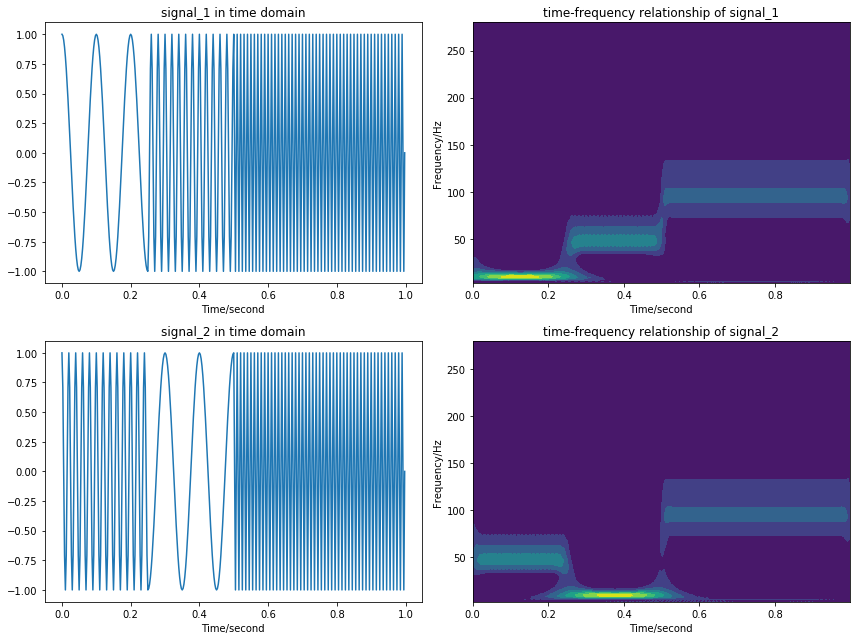

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pywt

t = np.linspace(0, 1, 400, endpoint=False)
cond = [t<0.25, (t>=0.25)&(t<0.5), t>=0.5]
f1 = lambda t: np.cos(2*np.pi*10*t)
f2 = lambda t: np.cos(2*np.pi*50*t)
f3 = lambda t: np.cos(2*np.pi*100*t)

y1 = np.piecewise(t, cond, [f1, f2, f3])
y2 = np.piecewise(t, cond, [f2, f1, f3])

cwtmatr1, freqs1 = pywt.cwt(y1, np.arange(1, 100), 'cgau8', 1/400)
cwtmatr2, freqs2 = pywt.cwt(y2, np.arange(1, 100), 'cgau8', 1/400)

plt.figure(figsize=(12, 9))
plt.subplot(221)
plt.plot(t, y1)
plt.title('signal_1 in time domain')
plt.xlabel('Time/second')

plt.subplot(222)
plt.contourf(t, freqs1, abs(cwtmatr1))
plt.title('time-frequency relationship of signal_1')
plt.xlabel('Time/second')
plt.ylabel('Frequency/Hz')

plt.subplot(223)
plt.plot(t, y2)
plt.title('signal_2 in time domain')
plt.xlabel('Time/second')

plt.subplot(224)
plt.contourf(t, freqs2, abs(cwtmatr2))
plt.title('time-frequency relationship of signal_2')
plt.xlabel('Time/second')
plt.ylabel('Frequency/Hz')

plt.tight_layout()
plt.show()

In [30]:
freqs1

array([280.        , 140.        ,  93.33333333,  70.        ,
        56.        ,  46.66666667,  40.        ,  35.        ,
        31.11111111,  28.        ,  25.45454545,  23.33333333,
        21.53846154,  20.        ,  18.66666667,  17.5       ,
        16.47058824,  15.55555556,  14.73684211,  14.        ,
        13.33333333,  12.72727273,  12.17391304,  11.66666667,
        11.2       ,  10.76923077,  10.37037037,  10.        ,
         9.65517241,   9.33333333,   9.03225806,   8.75      ,
         8.48484848,   8.23529412,   8.        ,   7.77777778,
         7.56756757,   7.36842105,   7.17948718,   7.        ,
         6.82926829,   6.66666667,   6.51162791,   6.36363636,
         6.22222222,   6.08695652,   5.95744681,   5.83333333,
         5.71428571,   5.6       ,   5.49019608,   5.38461538,
         5.28301887,   5.18518519,   5.09090909,   5.        ,
         4.9122807 ,   4.82758621,   4.74576271,   4.66666667,
         4.59016393,   4.51612903,   4.44444444,   4.37

In [15]:
pywt.central_frequency('cgau8' , precision=8)

0.7

In [31]:
dt = 1/400
pywt.scale2frequency('cgau8', np.arange(1, 10)) / dt

array([280.        , 140.        ,  93.33333333,  70.        ,
        56.        ,  46.66666667,  40.        ,  35.        ,
        31.11111111])